# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_price_fetch = requests.get(btc_url)
btc_price_fetch

<Response [200]>

In [6]:
#Load BTC price data into python dictionary using json.loads
btc_price_data = json.loads(btc_price_fetch.content.decode('utf-8'))
btc_price_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19170943,
   'total_supply': 19170943,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 20148.0,
     'volume_24h': 31212451927,
     'market_cap': 386363472768,
     'percentage_change_1h': 0.14644942316614,
     'percentage_change_24h': 0.233195210122895,
     'percentage_change_7d': 3.61442944680634,
     'percent_change_1h': 0.14644942316614,
     'percent_change_24h': 0.233195210122895,
     'percent_change_7d': 3.61442944680634}},
   'last_updated': 1665055454}},
 'metadata': {'timestamp': 1665055454,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [7]:
btc_current_price = btc_price_data['data']['1']['quotes']['USD']['price']
btc_current_price

20148.0

In [8]:
# Fetch current ETH price
eth_price_fetch = requests.get(eth_url)
eth_price_fetch

<Response [200]>

In [9]:
#Load ETH price data into python dictionary using json.loads
eth_price_data = json.loads(eth_price_fetch.content.decode('utf-8'))
eth_price_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120834189,
   'total_supply': 120834189,
   'max_supply': 120833685,
   'quotes': {'USD': {'price': 1360.11,
     'volume_24h': 10141520656,
     'market_cap': 164432761436,
     'percentage_change_1h': 0.145728229257507,
     'percentage_change_24h': 1.17332550470274,
     'percentage_change_7d': 1.49869571143898,
     'percent_change_1h': 0.145728229257507,
     'percent_change_24h': 1.17332550470274,
     'percent_change_7d': 1.49869571143898}},
   'last_updated': 1665055492}},
 'metadata': {'timestamp': 1665055492,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [10]:
eth_current_price = eth_price_data['data']['1027']['quotes']['USD']['price']
eth_current_price

1360.11

In [11]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price
my_btc_value, my_eth_value

(24177.6, 7208.583)

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24177.60
The current value of your 5.3 ETH is $7208.58


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [15]:
# Create the Alpaca API object
alpaca_api = tradeapi.REST( alpaca_api_key,
                            alpaca_secret_key,
                            api_version = 'v2')

In [16]:
# Format current date as ISO format
current_date = pd.Timestamp('2022-10-05', tz = "America/New_York").isoformat()
current_date

'2022-10-05T00:00:00-04:00'

In [17]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [18]:
# Get current closing prices for SPY and AGG
alpaca_df = alpaca_api.get_bars( tickers,
                                 timeframe,
                                 start = current_date,
                                 end = current_date).df
alpaca_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-05 04:00:00+00:00,96.76,96.99,96.27,96.66,9505965,27875,96.527323,AGG
2022-10-05 04:00:00+00:00,373.32,379.46,370.95,377.09,87641027,581349,375.456940,SPY


In [19]:
# Reorganize the DataFrame
# Separate ticker data
agg_df = alpaca_df[alpaca_df["symbol"] == "AGG"].drop("symbol", axis = 1)
spy_df = alpaca_df[alpaca_df["symbol"] == "SPY"].drop("symbol", axis = 1)

In [20]:
# Concatenate the ticker DataFrames
portfolio_df = pd.concat([agg_df, spy_df], axis = 1, keys=["AGG","SPY"])

In [21]:
# Preview DataFrame
portfolio_df

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-10-05 04:00:00+00:00  96.76  96.99  96.27  96.66  9505965       27875   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-10-05 04:00:00+00:00  96.527323  373.32  379.46  370.95  377.09   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2022-10-05 04:00:00+00:00  87641027      581349  375.45694

In [26]:
# Pick AGG and SPY close prices
agg_close_price = portfolio_df["AGG"]["close"].iloc[0]
spy_close_price = portfolio_df["SPY"]["close"].iloc[0]

In [28]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.66
Current SPY closing price: $377.09


In [29]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

In [30]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18854.50
The current value of your 200 AGG shares is $19332.00


### Savings Health Analysis

In [31]:
# Set monthly household income
monthly_income = 12000

In [33]:
# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_share_value = my_agg_value + my_spy_value
total_crypto_value , total_share_value

(31386.182999999997, 38186.5)

In [35]:
# Create savings DataFrame
df_savings = pd.DataFrame([total_crypto_value, total_share_value], index=["crypto", "shares"], columns = ["amount"])

In [36]:
# Display savings DataFrame
display(df_savings)

,amount
crypto,31386.183
shares,38186.500


<AxesSubplot:title={'center':'Composition of personal savings'}, ylabel='amount'>

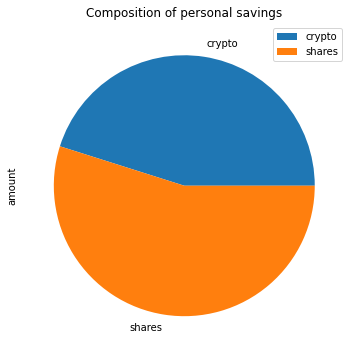

In [40]:
# Plot savings pie chart
df_savings.plot.pie( y="amount", figsize = (6,6), title = "Composition of personal savings")

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")